# __Forward and Futures Contracts__

__Based on Hull textbook: Futures, Options ans other derivatives__

In [2]:
import sys
path = '/home/jupyter-slava/teaching/lib/bsm'
sys.path.append(path)
import numpy as np
from MC import *

<br>

### __Forward: Contract Design__

A __forward contract__ is a contract to buy or sell an underlying asset at a
predetermined price $K$ (__delivery price__) on a specified future date $T$. 

  * __Long party__ agrees __to buy__ the underlying asset at the delivery price $K$ at
    time $T$
  * __Short party__ agrees __to sell__ the underlying asset at the delivery price $K$ at
    time $T$   
    
    

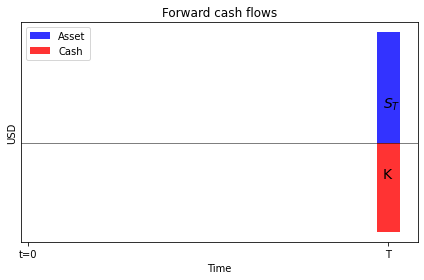

In [2]:
plot1()

__Payoff at Expiration:__

  * __The long__ receives the asset worth $S_T$ (price of the asset at maturity of the forward $T$) and pays    the delivery price $K$. Thus the cash flow (payoff) from the long forward position at maturity $T$ is: $S_T − K$. 
      * Some forward contracts are cash physically settled, while some are cash settled. 
     
     
  * __The short__ receives the cash amount $K$ and delivers the asset worth $S_T$ in exchange (payoff is $K − S_T$). 
          

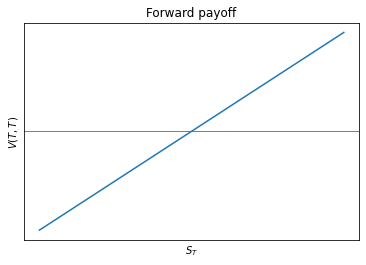

In [3]:
plot2()

<br>

#### __Valuation__ 

_How do you establish the fair delivery price $K$ in the forward contract?_

__Notations:__


  * $S_t$: underlying asset price at time $t$ 
  * $K$: delivery price specified at contract inception 
  * $V(t,T)$: present value at time $t≥0$ of the forward contract initiated at $t=0$ and expiring at $T$
  * $F(t,T)$ or simply $F$: forward price at time $t$ for settlement at time $T$
  * $r$ - risk-free interest rate per annum with continuous compounding (initially we assume that the term structure is    flat)
    

__Assumptions of perfect markets:__


  * Market participants can lend and borrow at the same risk-free rate of interest
  
  * There are no arbitrage opportunities, or market participants take advantage of arbitrage opportunities instantaneously as they occur 
    

<br>

#### __Case 1: No Dividends__


Payoff from a long forward position:  $V(T,T) = S_T - K$ 
  
At inception, a forward contract is neither an asset nor liability.<br/> It is set up so that     its __PV at inception is zero__ to both parties:  $V(0,T) = 0$
  
__Definition__: __Forward price $F(0,T)$__  is such a delivery price $K$ that sets the timezero present value of the forward contract to zero.
  
__Problem__: find such $K = F(0,T)$ that sets the PV of the forward contract to zero,
    i.e., $V(0,T) = 0$.
    
__Result__: $K = F(0,T) = e^{rT}S_0$
      
__Proof__: creating a synthetic forward position and arbitraging the actual forward contract against the synthetic forward position
  
__Synthetic forward position__ ($t=0$):
  
* Borrow $e^{−rT} K$ dollars until time $T$ at the risk-free rate $r$;
    
* Buy the asset at spot price $S$; 
     
* Payoff at time T is $S_T − K$ , which is the same as the payoff of the forward contract.<br/>  Therefore, its value (price) at $t=0$ should be equal to the value of forward contract (to avoid arbitrage). <br/>The value of synthetic forward at time zero is $S_0 − e^{
−rT} K$ .

* At strike level $K^*=e^{rT}S$ , the value of forward contract is zero
    
__Note__: To create synthetic forward with zero value, we need to borrow $S_0$ dollars, and buy 1 stock 
  
 


<br>

__Arbitrage__


Suppose $F(0,T) = e^{rT}S$ does not hold, and for example, $F(0,T) > e^{rT}S$ . This violates non-arbitrage assumption. To realize arbitrage: 
  
  __Short the actual forward and go long a synthetic forward__ (create a synthetic forward contract by borrowing cash and buying the asset): 
      
      
At time t=0 :
    
  * Borrow $S$ dollars until time $T$ at the risk-free rate $r$ ;
  * Use these dollars to buy the asset at spot price $S$ ;
  * Take a short position in the forward contract with delivery price $F(0,T)$
      
    Note, no capital investment is needed to do this (zero initial cost). 
        
At time T :
  
  * Sell the asset for the delivery price $F(0,T)$ ;
    
  * Use the amount $e^{rT}S$ of the proceeds to repay the loan plus interest. 
    
    
__Profit and Loss (P&L)__: a riskless and costless arbitrage profit of $F(0,T)−e^{rT} S_0>0$ 
  
In the case $F(0,T) < e^{rT}S$ the arbitrage can be realize by going __long in the actual forward and shorting a synthetic forward__.
  
Thus $F(0,T) = e^{rT}S$
  
 

<br>

#### __Case 2: Discrete dividends__


__Examples__: Coupon bearing bonds, stocks paying cash dividends
  
  
Let $I_0$ be PV at $t=0$ of all income to be received from the asset between $t=0$ and $T$ (discounted at the risk-rate; assume all future cash dividends between $0$ and $T$ are known).
  
Need to find fair forward price $F(0,T)$ for this case.

Create a synthetic forward position ($t=0$) which replicates the forward contract:    
    
* Borrow $e^{−rT}K$ dollars until time $T$ at the risk-free rate $r$;
    
* Buy one unit of asset at spot price $S$
    
* Borrow $I_0$ dollars at the risk-free rate $r$;
    
    
Since we can use dividens to return debt, which was equivalent of $I_0$ to time zero, the only cash flow from the synthetic forward position is equal to $S_T − K$ at time $T$(the same as forward payoff) 
  
The value of synthetic forward at time zero is $S − e^{−rT}K-I_0$

At strike level $K^*=e^{rT}(S-I_0)$ , the value of forward contract is zero
  
__Result__: $F(0,T) = e^{rT}(S-I_0)$
  
 

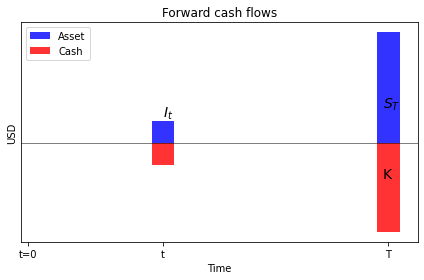

In [4]:
plot3()

<br>

#### __Case 3: Continuous Dividend__


Suppose the underlying asset pays dividends continuously at the constant rate $q$ (dividend yield), so that the dividend paid over an infinitesimal time period $dt$ is $qS_tdt$
  
Then $X_0 = e^{−qT}$ units of the asset purchased at time $t=0$ grow to one unit of the asset by time $t=T$ due to the accumulation of dividends, assuming all dividends are reinvested in the asset as soon as they are received.
  
__Proof__: $dX = \frac{qX t S_t dt}{ S_t} = qX_t dt$ - the amount of asset bought      during $dt$. Thus $X_t= e^{ qt} X_0$, and if $X_0 = e^{−qT}$, $X_T = 1$ 
  
  
  * Create a synthetic forward position ($t=0$) which replicates the forward contract:    
    
    * Borrow $e^{−rT}K$ dollars until time $T$ at the risk-free rate $r$;
   
    * Buy $e^{−qT}$ units of asset at spot price $S$
    
    
  * Payoff of a synthetic forward position $S_T − K$ (the same as forward payoff)
  
  * The value of synthetic forward at time zero is $e^{−qT}S − e^{−rT}K$
  * At strike level $K^*=e^{(r−q)T}S$ , the value of forward contract is zero
  
__Result__: $F(0,T) = e^{(r-q)T}S$
  
 

<br>

### __Forward. Marking to market__

At some time $t$ during the life of the contract, $0≤t≤T$, __PV__ of a long forward contract with delivery price $K$ is generally different from zero. It is equal to the present value of the difference between the current forward price $F(t ,T)$ at time $t$ and the delivery price $K$ (that was set equal to the forward price $F(0,T)$ at the forward contract inception $t=0$): 
  
  $V(t,T) = e^{-r(T-t)}(F(t,T)-K)$
    
 
Since $S_T−K = (S_T−F(t,T))+(F(t,T)−K)$, the seasoned forward contract is equivalent to the combination of:
   
* A newly written __short forward contract__ + 
   
* __Fixed cash amount__ $F(t,T)−K$ to be received at $T$.
 
 
Since PV of the newly written forward is zero, PV of the seasoned forward is equal to PV of the cash amount $F(t,T)−K$ , i.e., 
$$V(t,T) = e^{-r(T-t)}(F(t,T)-K)$$
     
 
* For the underlying asset that pays no income before time T :
  
     $V(t,T) = S - e^{-r(T-t)}K$
 
 
* For the contract is written for N underlying assets (__N is notional__), then:
  
     $V(t,T) = Ne^{-r(T-t)}(F(t,T)-K)$
  
    

<br> 

### __Currency Forwards__

If the underlying asset is a foreign currency, then the forward exchange rate is:
  
  $F(0,T) = e^{(r_d - r_f)T}S_0$
  
where $r_d$ and $r_f$ are the domestic and foreing risk-free interest rates
    
The foreign currency can be thought of as the asset that pays continuous dividend yield at the rate $r_f$
      
      
The exchange forward rate can be expressed using the domestic and foreign discount factors:
   
  $F(0,T) = e^{(r_d - r_f)T}S_0 = \frac{P_f(0,T)}{P_d(0,T)}S_0$
    
 
The exchange forward rate can be also derived using the following logics:
 
* The value of 1 USD paid at $t=T$ is equal to $e^{- r_fT}$ USD at $t=0$
  
* This is equivalent to $e^{- r_f T}S_0$ RUB at $t=0$
  
* which is equivalent to $e^{(r_d - r_f) T}S_0$ RUB at $t=T$
  
* Therefore, 1 USD paid at $t=T$ is equivalent to $e^{(r_d - r_f) T}S_0$ RUB at paid $t=T$
 
  
    

<a id='AssetMoney'></a>
#### __Asset or Money?__

Dealing with FX derivatives contracts can be tricky, since an underlying asset is also currency. At the beginning, it is __important__ to determine, which currency will be considered as money, and which one as an underlying asset (we measure asset prices in "money").

There is duality here. We can solve a problem by taking any currency as money, but once it is fixed, it should keep it this way, until the final price is derived.

The simplest way to choose the money is to use exchange rate, provided in the text of the problem, as an asset price. Supposed there are two currencies: X and Y. Exchange rate X/Y states, that one unit of currency X devided by one unit of currency Y is equal to the exchange rate. Then take X as an asset, Y as money (cash).

For example, EUR/USD is equal to 1.1 It means one EUR is worth 1.1 USD.
EUR is an underlyng asset, USD is money.



<a id='example1'></a>
#### __Example from past exam__


The current USD/RUB exchange rate is $S=60$. <br/>
The risk free interest rates are $5\%$ (for RUB) and $2\%$ (for USD) (continuous compounding). <br/>

a) Determine 2 month forward rate for USD/RUB exchange rate.<br/>

In [3]:
S, r, q, T = 60, 0.05, 0.02, 2/12
F2m=np.exp((r-q)*T)*S
print("F2m= {0:.3f}".format(F2m))

F2m= 60.301


b) The bank enters the forward contract to sell $100m$ RUB to USD at 2m forward rate (calculated in a)). 

- __(Only for this question assume)__ In 1 months the exchange rate changed to $63$ , and USD interest rate goes down to $1\%$. 

- Marked to market the forward contract.<br/>


Selling 100 M RUB is equavalent to buying N=100/K M USD

In [4]:
N=100/F2m
S1, r1, q1, t= 63, 0.05, 0.01, 1/12
Fnew=np.exp((r1-q1)*t)*S1
V=np.exp(-r1*t)*(Fnew-F2m)*N
print("N= {0:.3f} M USD".format(N))
print("Fnew= {0:.3f} M RUB".format(Fnew))
print("V= {0:.3f} M RUB".format(V))

N= 1.658 M USD
Fnew= 63.210 M RUB
V= 4.805 M RUB


<br>

#### __Par forward__

__Motivation__: A Russian company will have to make annual payments in USD for the next three years. The amount of each payment is $N$ USD at the end of each year. The company wishes to hedge its risk exposure to the USD/RUB exchange rate. It enters into a __Par-Forward__ contract with the bank. Each year, the company will make fixed payments to the bank. It will pay fixed amount $N⋅K$ RUB and receive $N$ USD, where $K$ is a pre-negotiated fixed exchange rate that will apply for the entire duration of the contract (three years). Thus, the company is fixing the exchange rate over the entire period.

__Pricing__:

In general case, when there are n exchange trades at times $t_i, i=1,n$, PV of the Par-Forward is equal to the PV of portfolio of $n$ FX forwards with maturities $t_i, i=1,n$. We find such a $K$ so it is neither an asset nor liability at inception:
    
$PV(K) = \sum_{i=1,n}Ne^{-r_{RUB}t_i}(F(0,t_i;K)-K)=0$
    
Then fair $K$ is equal to
    
$K = \frac{\sum_{i=1,n}e^{-r_{RUB}t_i}F(0,t_i;K)}{\sum_{i=1,n}e^{-r_{RUB}t_i}}$

<br>

#### __Currency Forwards: Applications in Financial sector__

<a id='d5c1'></a>
##### __Hedging__

__Example__: To purchase equipment a Russian telecommunication company is supposed to make 10m USD payment in 6 months. To hedge agaist currency flactuations the company enters FX forward contract to buy 10m USD for RUB at the current 6m forward rate. 
  
  
__Par Forward__
  

##### __Converting funding from one currency to another__

Suppose, a bank have access to USD LIBOR market and needs to provide its Russian client with RUB funding (A client needs to borrow $L$ amount of RUB).
   
The USD/RUB forward rate is $F$ and USD LIBOR rate for time $T$ is $r_{USD}$. The implied RUB rate $r_{RUB}$ satisfies:

$$F = F(0,T) = e^{(r_{RUB} - r_{USD})T}S_0$$
     
At $t=0$: 

* The bank borrows $\frac{L}{S_0}$ amount of dollars on LIBOR at $r_{USD}$ rate. It is supposed to return $\frac{L}{S_0}e^{r_{USD}T}$ USD at $t=T$.

* Convert USD to RUB using spot exchange rate $S_0$ and lend this money ($L$ RUB) to the borrower at rate $r_{RUS}$. The borrower is supposed to return $Le^{r_{RUB}T}$  RUB at $t=T$. 

* Enter a forward contract to buy $N = \frac{L}{S_0}e^{r_{USD}T}$ USD ($N$ is notional of forward contract) against RUB for $F$ at $t=T$ 

* Need to deliver $N*F = \frac{L}{S_0}e^{r_{USD}T}*e^{(r_{RUB} - r_{USD})T}S_0 = \frac{L}e^{r_{RUB}T}$ RUB
  
 
At $t=T$:
   
The borrower returns $Le^{r_{RUB}T}$  RUB 
  
* Forward Settlement: The banks deliver $L e^{r_{RUB} T}$ RUB and receive $\frac{L}{S_0}e^{r_{USD} T}$ USD
     
* Pay USD debt on LIBOR account.
     
__The result__: Being able to borrow on LIBOR and having access to USD/RUB forwards, we are able to lend RUB at implied forward RUB rates.
     

In [ ]:
plt.close('all')

<br>

### __Futures__

<a id='f1'></a>
#### __Futures contracts vs. forward contracts__

Futures contracts are specified by the exchange, while forward contracts are private OTC arrangements. 

|  <font size=4>__Forwards__</font> |  <font size=4>__Futures__</font> |
| :---     | ---------: |
| <font size=3>Private OTC contracts  </font>   | <font size=3>    Traded on exchange </font> |
| <font size=3>Not standardized   </font>| <font size=3>  Standardized </font> |
| <font size=3>Settled at contract expiration  </font>| <font size=3>  Settled daily </font> |
| <font size=3>Counterparty credit risk   </font>| <font size=3>  No credit risk  </font> |

<a id='f2'></a>
#### __Designing a new futures contract__

* Specify the underlying asset - quality option and location option

* Contract size

* Delivery arrangements - timing options (for commodities delivery can be made anytime during the delivery month; the short has the right to choose when to deliver)

* Price quotes - minimum price movement

* Daily price movement limits (limit up/limit down)

* Position limits for speculators 

#### __Futures Trading Mechanics__

* Deposit __initial margin__ with your broker (margins set by the exchanges depending on the contract’s volatility and changed often)

* __Daily settlement__: at the end of each day your account is marked to market and actually adjusted to reflect the current end-of-day P&L: deposits are made and losses are withdrawn. Futures contracts are actually re-settled each day: PV of a futures position is always zero at the end of the day: V is resettled each day to zero. 

* Many financial futures are settled in cash (e.g., S&P 500 futures). 

* Convergence of futures price to spot

  * As the delivery month of a futures contract is approached, the futures price converges to spot. If this were not true, there would be an arbitrage opportunity.

<a id='f4'></a>
#### __Commodity Futures__

__Investment vs. consumption commodities__ 

__Investment commodities__ are commodities held by a significant number of investors solely for investment purposes (gold and silver). 

* Storage costs can be regarded as negative income. Let $U$ denote the present value of all storage costs to be incurred over the life of the contract: 

    $U=PV(All\; storage \: cost)$
    
* Then the futures price of an investment commodity (gold, silver) is:

    $ F =e^{rT}(S+U)$
    
* If storage costs are proportional to the price of the commodity, they can be regarded as a negative dividend yield:

     $F =e^{(r+u)T}S$, where $u$ are storage costs per annum as a proportion of the spot price. 
 

__Consumption commodities__. There are certain benefits associated with holding physical commodities in stock (keep production running, avoid stock-outs, take advantage of local short-term shortages, etc.) 

*  For consumption commodities we only have the inequality:
    
     $ F <=e^{rT}(S+U)$
     
    Even if futures fall to a discount, the holders of physical commodity will not
    sell the physical and buy the futures, since they need the physical commodity for
    current consumption. 
    
* Suppose y is an effective payment rate (yield) for the potential inconvenience of a stock- out for     commodity, called convenience yield. It is defined as follows: 
    
    $F =e^{(r-y)T}(S+U)$
    
* For investment assets, convenience yield should be equal to zero. Otherwise, there are arbitrage opportunities.
    
    



##### __Cost of carry__ 

Interest paid to finance the asset + storage costs - income
earned on the asset 

Cost of carry rate for different assets: $c=$ 

  * Assets with no dividends and storage costs: $r$
  * Stock index: $r−q$
  * Foreign currency: $r_d−r_f$
  * Commodity: $r+u$
  
  
Then, the futures price can be expressed as: 

  * Investment asset: $F = e^{cT}S$ 
  * Consumption asset: $F = e^{(c-y)T}S$